# 0.Import Libraries

In [3]:
import os
        
import pandas as pd
import numpy as np
# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# feature engineering
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.ensemble import StackingClassifier, RandomForestClassifier


# for xgboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# for other model types
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

# for evaluating metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix

ModuleNotFoundError: No module named 'pandas'

# 1.Load Dataset

In [2]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
dataset=pd.read_excel(r'../input/acoustic-extinguisher-fire-dataset/Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx',
                      sheet_name='A_E_Fire_Dataset')

# 2.Analyze Data

In [4]:
dataset.shape

(17442, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


In [6]:
dataset.isnull().sum().sum()

0

In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


 # 3.Visualize Data


In [9]:
plt.style.use('seaborn-darkgrid')

## 3.1 Histogram Plot

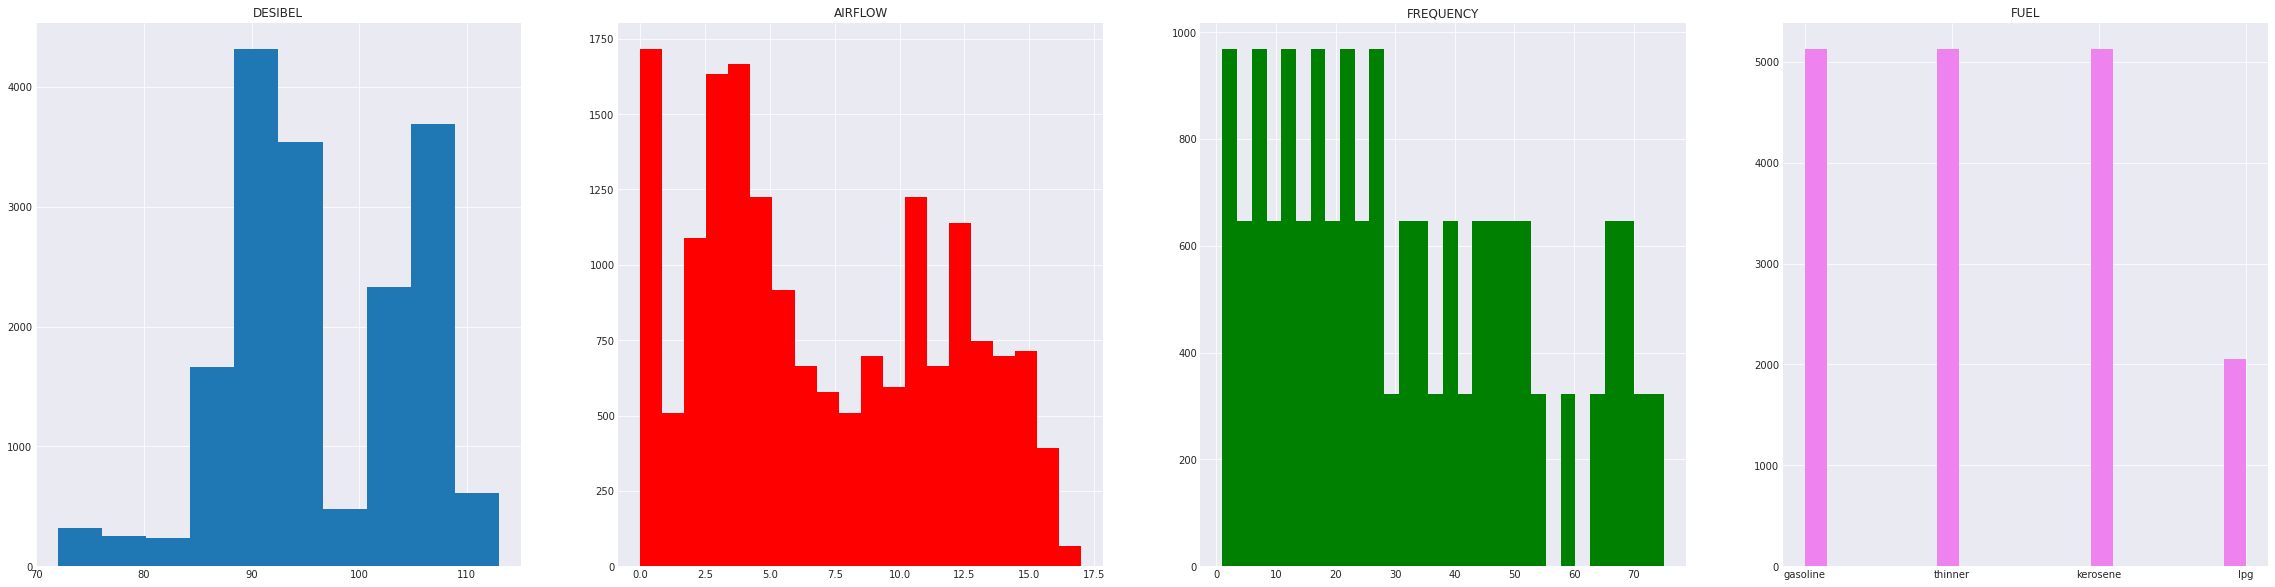

In [10]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(nrows=1,ncols=4,figsize=(40,10))

ax1.hist(dataset.DESIBEL,bins=10)
ax1.set_title('DESIBEL')
ax2.hist(dataset.AIRFLOW,color='red',bins=20)
ax2.set_title('AIRFLOW')
ax3.hist(dataset.FREQUENCY,color='green',bins=30)
ax3.set_title('FREQUENCY')
ax4.hist(dataset.FUEL,color='violet',bins=20)
ax4.set_title('FUEL')
fig.show()

## 3.2 Pie Plot

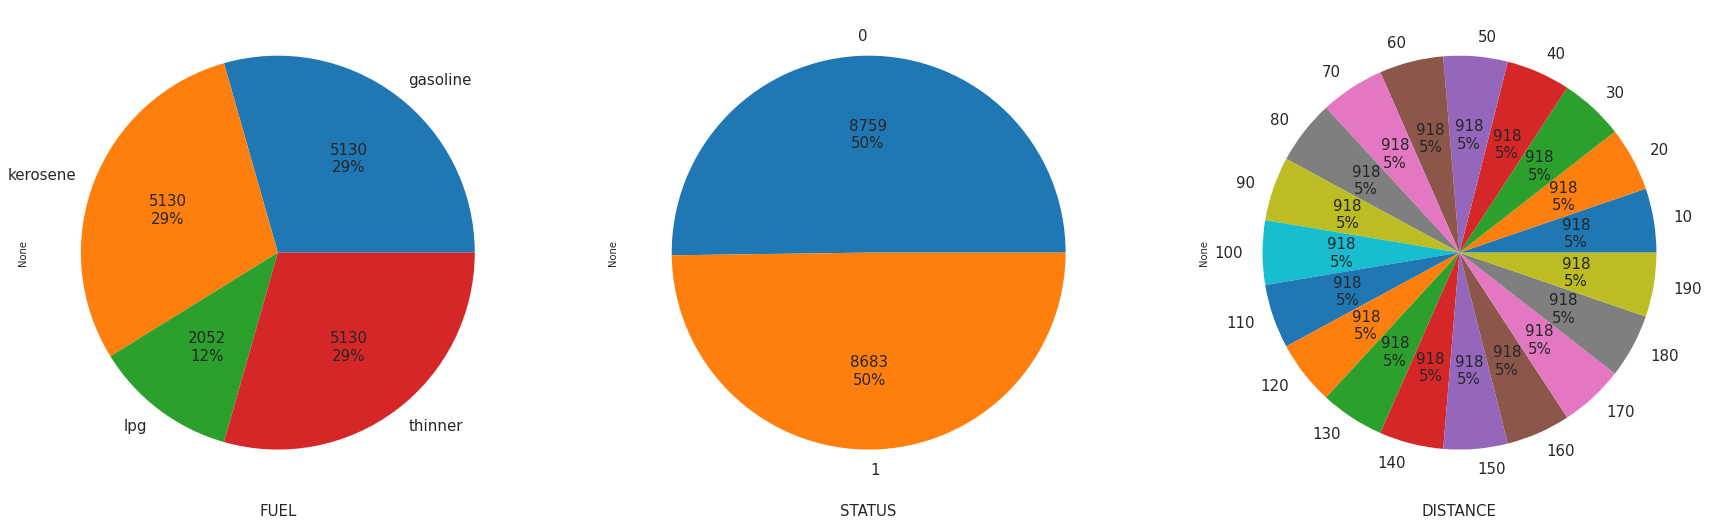

In [11]:
fig, (ax0,ax1,ax2)=plt.subplots(nrows=1,ncols=3,figsize=(30, 10))
def label_function(val):
    return f'{val / 100 * len(dataset):.0f}\n{val:.0f}%'

# feedrate
dataset.groupby('FUEL').size().plot(kind='pie',
                                      autopct=label_function, 
                                      textprops={'fontsize': 15},
                                      ax=ax0)                                         
ax0.set_xlabel('FUEL',size=15)

# feedrate
dataset.groupby('STATUS').size().plot(kind='pie',
                                      autopct=label_function, 
                                      textprops={'fontsize': 15},
                                      ax=ax1)                                         
ax1.set_xlabel('STATUS',size=15)

# feedrate
dataset.groupby('DISTANCE').size().plot(kind='pie',
                                      autopct=label_function, 
                                      textprops={'fontsize': 15},
                                      ax=ax2)                                         
ax2.set_xlabel('DISTANCE',size=15)

# showing the figure
fig.show()

## 3.3 Scatter Plot

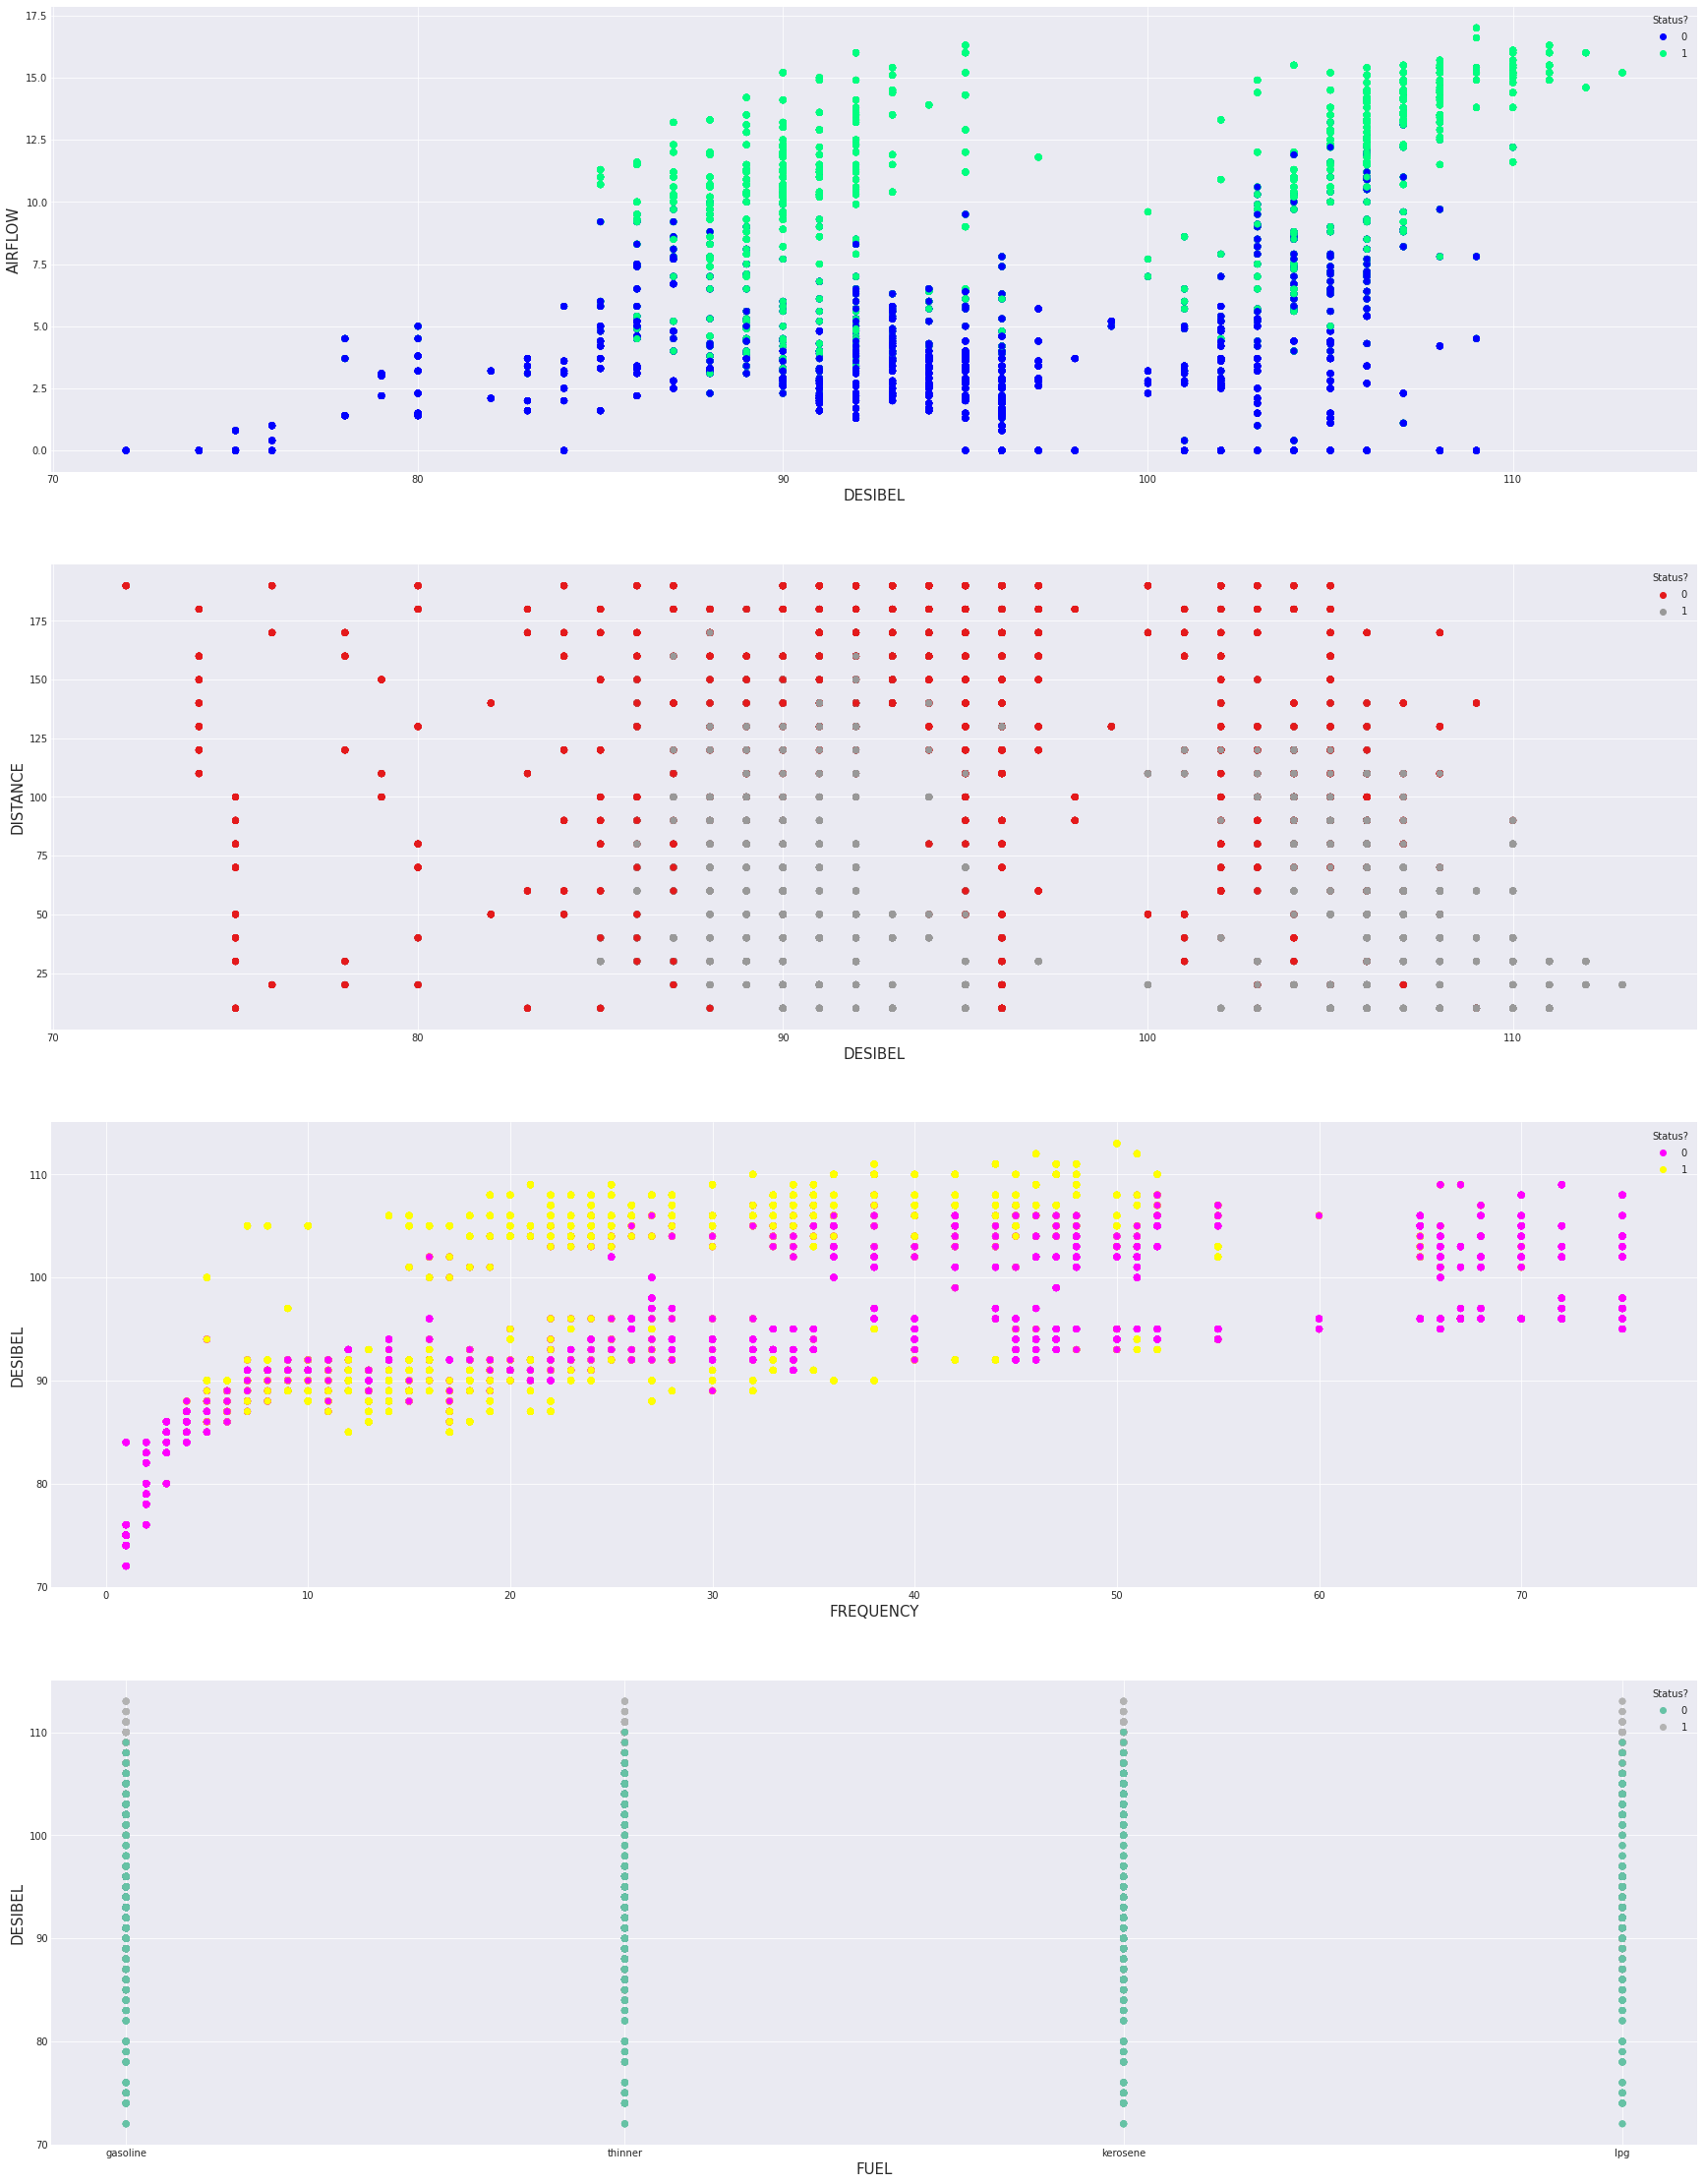

In [12]:
# created figure with 3 ax in it
fig, (ax0,ax1,ax2,ax3)=plt.subplots(figsize=(30,40),
                            ncols=1,
                            nrows=4)

# ax0 is a scatter plot
plot0=ax0.scatter(dataset['DESIBEL'],
                dataset['AIRFLOW'],
                c=dataset['STATUS'],
                cmap='winter')
ax0.legend(*plot0.legend_elements(),
          title="Status?")
ax0.set_xlabel('DESIBEL',size=15)
ax0.set_ylabel('AIRFLOW',size=15)
 
plot1=ax1.scatter(dataset['DESIBEL'],
                dataset['DISTANCE'],
                c=dataset['STATUS'],
                cmap='Set1')
ax1.legend(*plot1.legend_elements(),
          title="Status?")
ax1.set_xlabel('DESIBEL',size=15)
ax1.set_ylabel('DISTANCE',size=15)


plot2=ax2.scatter(dataset['FREQUENCY'],
                dataset['DESIBEL'],
                c=dataset['STATUS'],
                cmap='spring')
ax2.legend(*plot2.legend_elements(),
          title="Status?")
ax2.set_xlabel('FREQUENCY',size=15) 
ax2.set_ylabel('DESIBEL',size=15)

plot3=ax3.scatter(dataset['FUEL'],
                dataset['DESIBEL'],
                c=dataset['STATUS'],
                cmap='Set2')
ax3.legend(*plot3.legend_elements(),
          title="Status?")
ax3.set_xlabel('FUEL',size=15)
ax3.set_ylabel('DESIBEL',size=15)
fig.show()

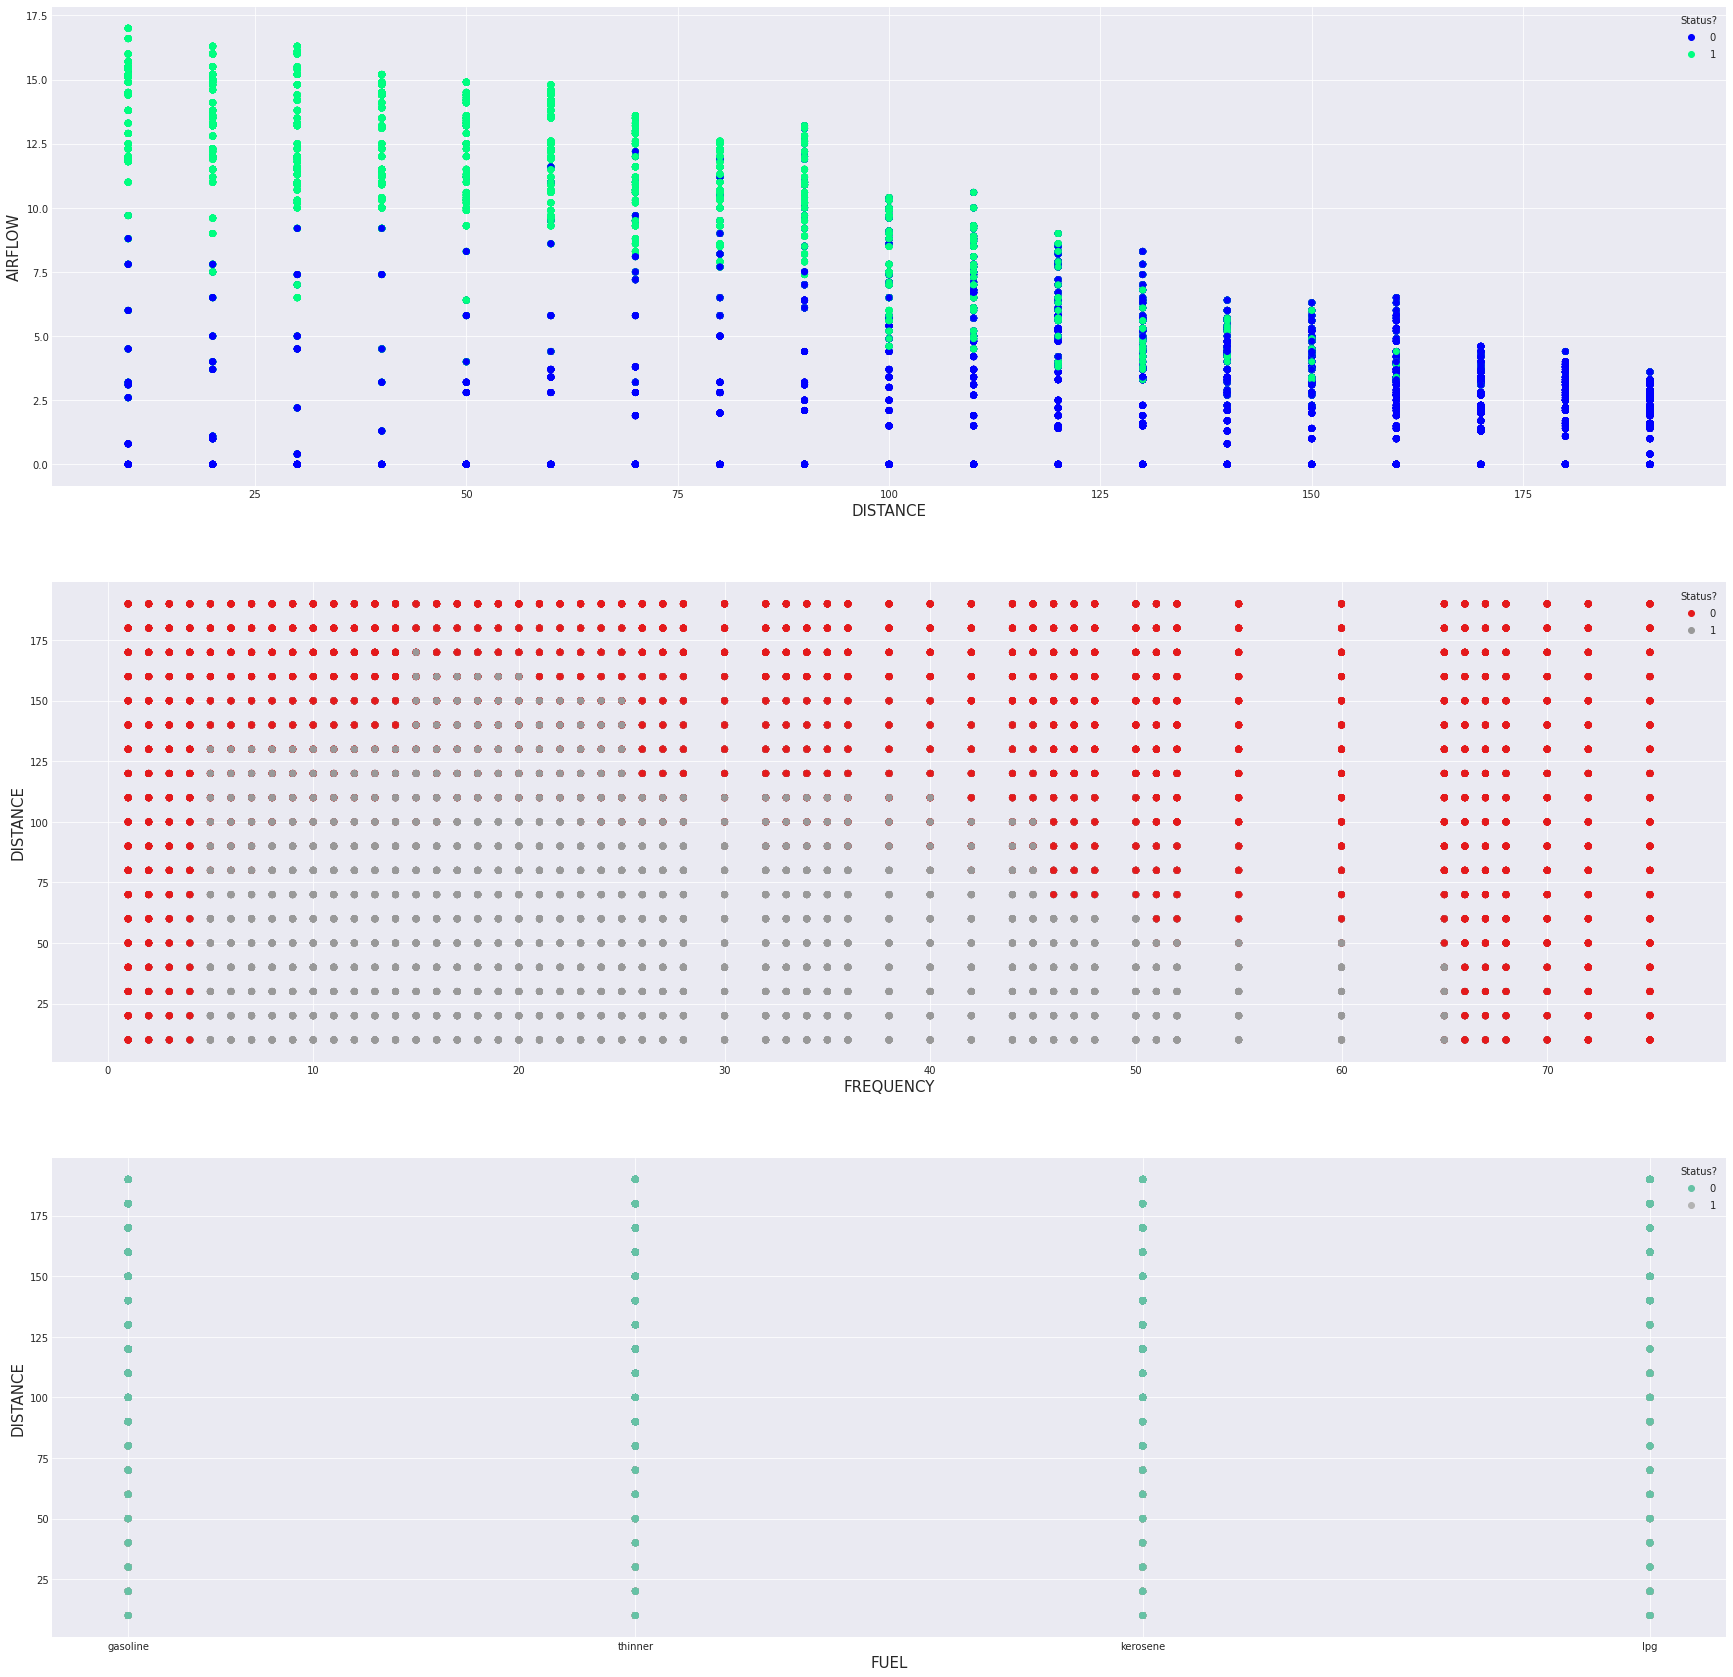

In [13]:
# created figure with 3 ax in it
fig, (ax0,ax1,ax2)=plt.subplots(figsize=(30,30),
                            ncols=1,
                            nrows=3)

# ax0 is a scatter plot
plot0=ax0.scatter(dataset['DISTANCE'],
                dataset['AIRFLOW'],
                c=dataset['STATUS'],
                cmap='winter')
ax0.legend(*plot0.legend_elements(),
          title="Status?")
ax0.set_xlabel('DISTANCE',size=15)
ax0.set_ylabel('AIRFLOW',size=15)

plot1=ax1.scatter(dataset['FREQUENCY'],
                dataset['DISTANCE'],
                c=dataset['STATUS'],
                cmap='Set1')
ax1.legend(*plot1.legend_elements(),
          title="Status?")
ax1.set_xlabel('FREQUENCY',size=15)
ax1.set_ylabel('DISTANCE',size=15)


#ax1 is a scatter plot 
plot2=ax2.scatter(dataset['FUEL'],
                dataset['DISTANCE'],
                c=dataset['STATUS'],
                cmap='Set2')
ax2.legend(*plot2.legend_elements(),
          title="Status?")
ax2.set_xlabel('FUEL',size=15)
ax2.set_ylabel('DISTANCE',size=15)

fig.show()

## 3.4 Heat Map

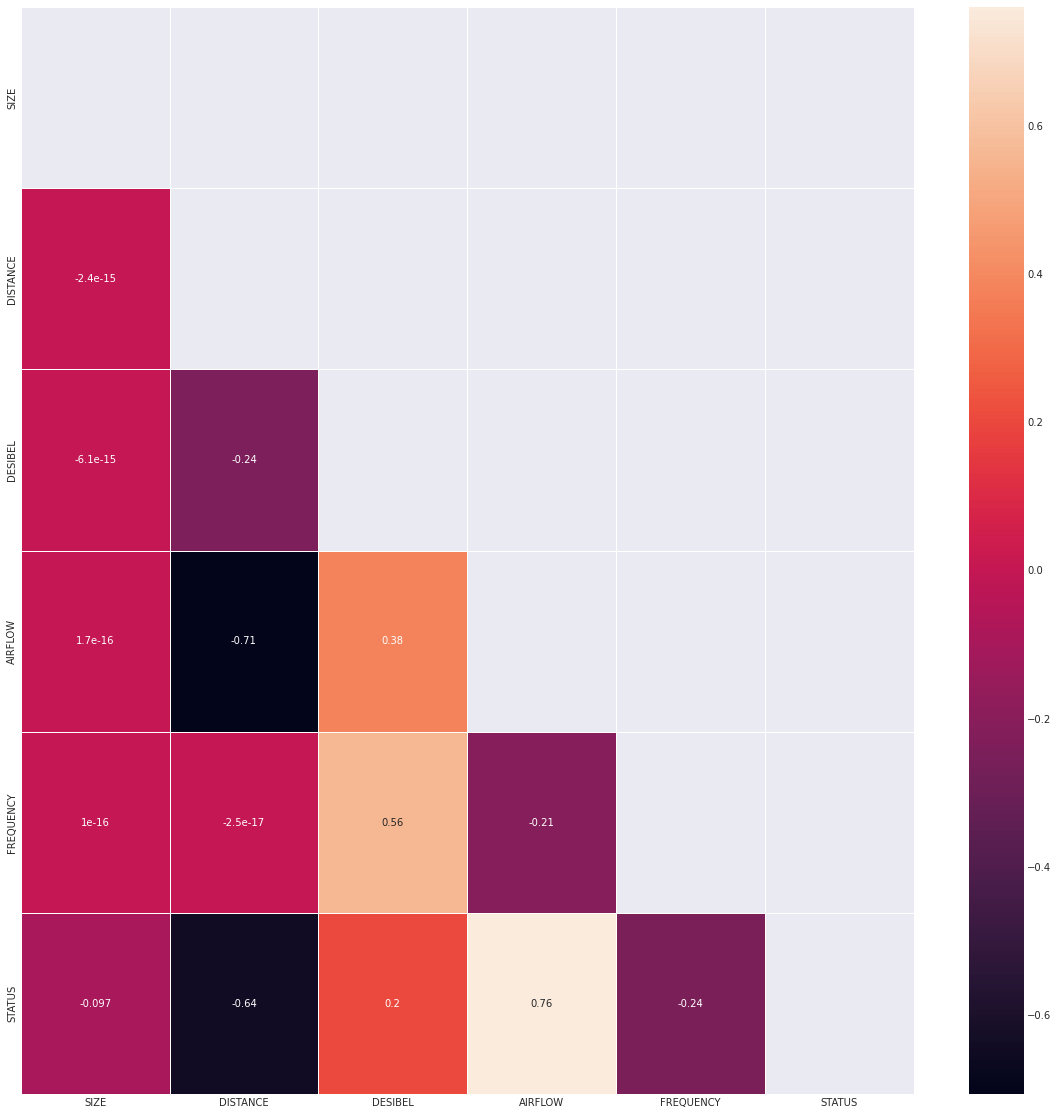

In [14]:
a=dataset.corr()
matrix = np.triu(a)
fig, ax=plt.subplots(figsize=(20,20))
ax=sns.heatmap(a, linewidth=1, annot=True,mask=matrix)
fig.show()

## 3.5 Normal Distribution

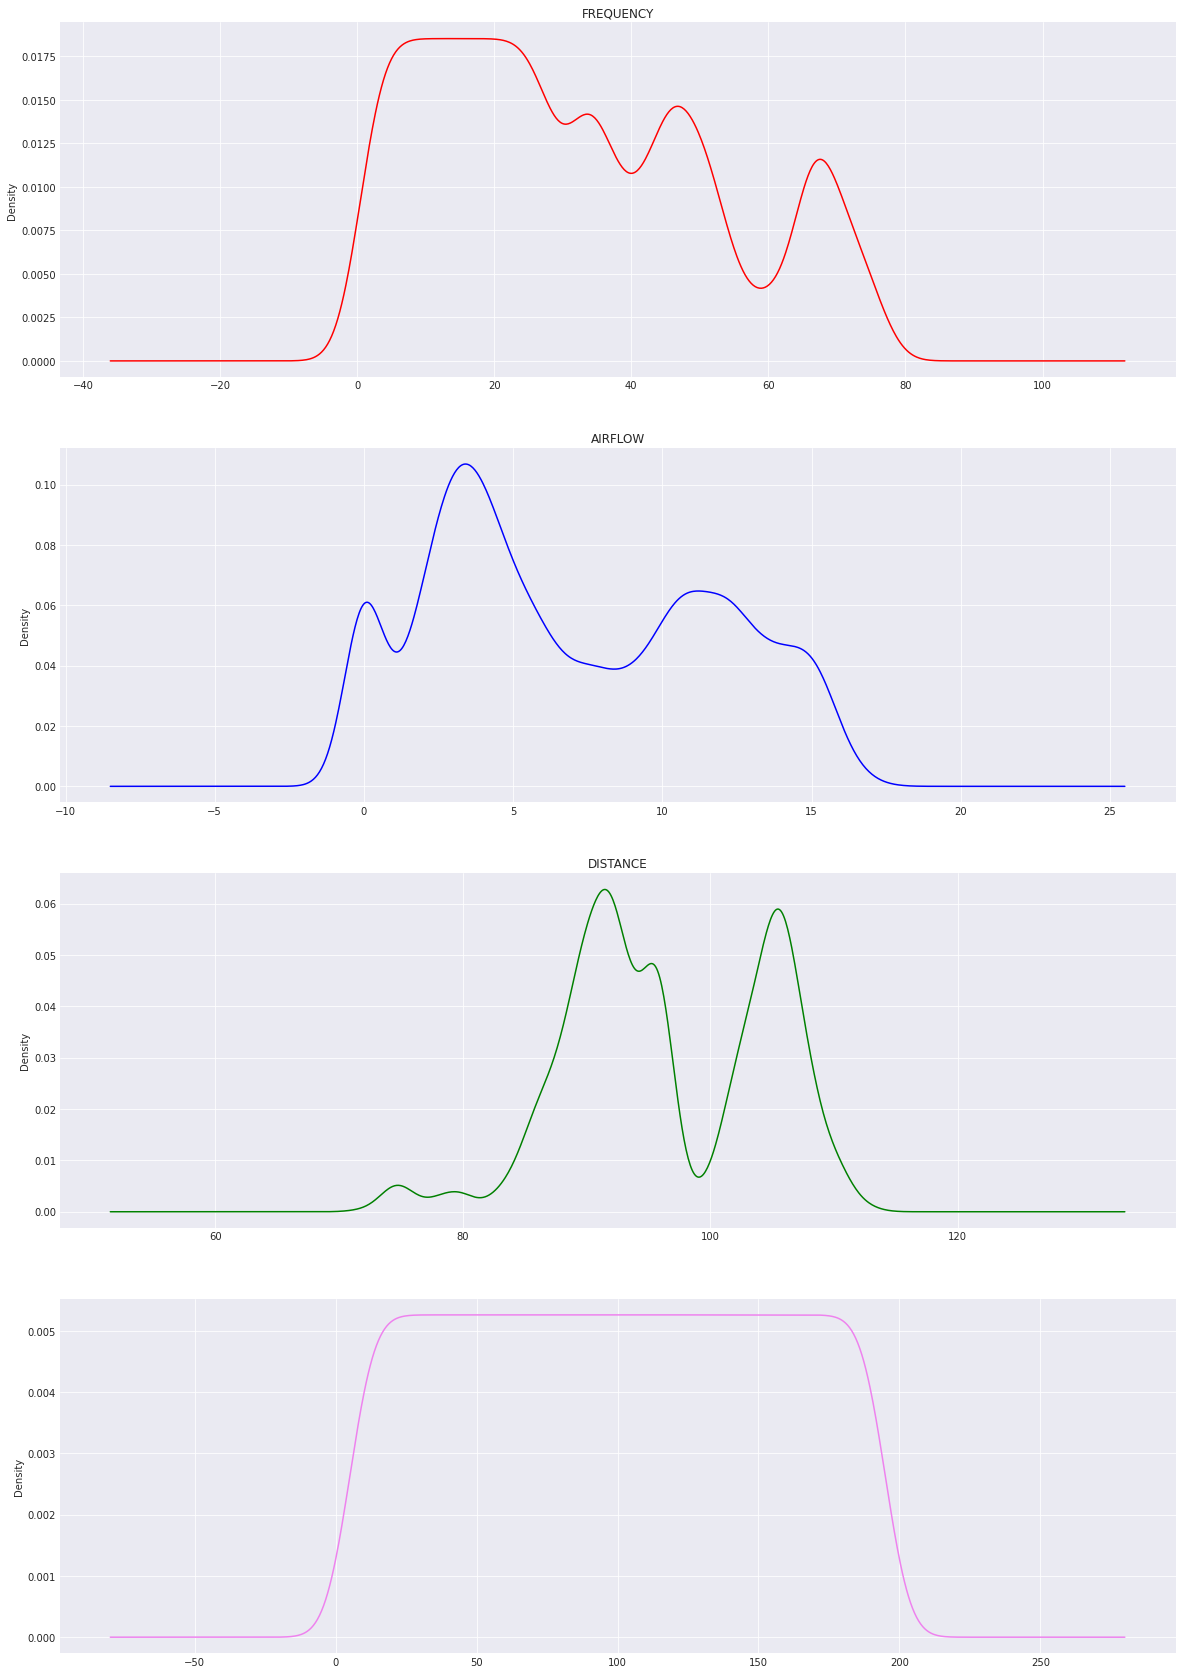

In [15]:
fig, (ax0,ax1,ax2,ax3)=plt.subplots(nrows=4,ncols=1,figsize=(20,30))
dataset['FREQUENCY'].plot(kind='kde',ax=ax0,color='red')
ax0.set_title('FREQUENCY')
dataset['AIRFLOW'].plot(kind='kde',ax=ax1,color='blue')
ax1.set_title('AIRFLOW')
dataset['DESIBEL'].plot(kind='kde',ax=ax2,color='green')
ax2.set_title('DESIBEL')
dataset['DISTANCE'].plot(kind='kde',ax=ax3,color='violet')
ax2.set_title('DISTANCE')
fig.show()

## 3.6 Box plots

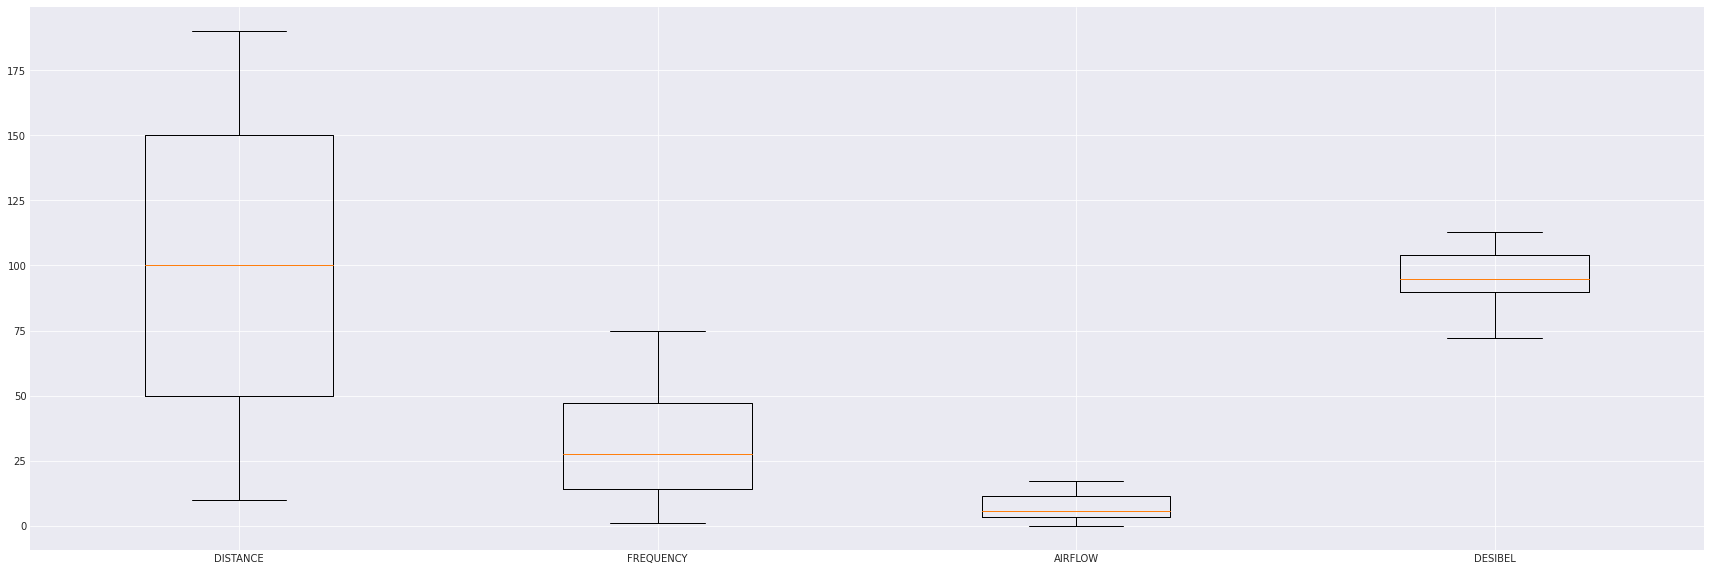

In [16]:
fig, (ax0)=plt.subplots(nrows=1,ncols=1,figsize=(30,10))
data=[dataset['DISTANCE'],
     dataset['FREQUENCY'],
     dataset['AIRFLOW'],
     dataset['DESIBEL']]
ax0=plt.boxplot(data,labels=['DISTANCE','FREQUENCY','AIRFLOW','DESIBEL'])
fig.show()

In [17]:
dataset['SIZE'].value_counts()

1    3078
2    3078
3    3078
4    3078
5    3078
6    1026
7    1026
Name: SIZE, dtype: int64

In [18]:
dataset['FUEL'].value_counts()

gasoline    5130
thinner     5130
kerosene    5130
lpg         2052
Name: FUEL, dtype: int64

# 4.Train Test Split

In [19]:
features=dataset.drop(['STATUS'],axis=1)
labels=dataset['STATUS']

X_train, X_test, Y_train, Y_test=train_test_split(features,labels,test_size=0.33)

# 5.Column Transformer

In [20]:
num_columns=[c for c in X_train.columns if X_train[c].dtypes !='O']
cat_columns=[c for c in X_train.columns if X_train[c].dtypes =='O']

num_columns_transformer=make_pipeline(StandardScaler())
col_columns_transformer=make_pipeline(OneHotEncoder())

col_transformer=ColumnTransformer(transformers=[
    ('num_transformer',num_columns_transformer,num_columns),
    ('col_transformer',col_columns_transformer,cat_columns)
])

# 6.Class Weight

In [21]:
class_count=Y_train.value_counts().to_dict()

for key, value in class_count.items():
    # do something with value
    class_count[key] = (round((value/len(Y_train)),8))

class_count

{0: 0.50128359, 1: 0.49871641}

# 7.Model Definition
Source: https://ryan-reilly.medium.com/gridsearch-pipelines-of-multiple-models-on-multiclass-classification-e9124b6ea2e3

In [22]:
pipe_lr = Pipeline([('transformer',col_transformer),
                    ('LR', LogisticRegression(random_state=42,class_weight=class_count))])
pipe_dt = Pipeline([('transformer',col_transformer),
                    ('DT',DecisionTreeClassifier(random_state=42,class_weight=class_count))])
pipe_rf = Pipeline([('transformer',col_transformer),
                    ('RF',RandomForestClassifier(random_state=42,class_weight=class_count))])
pipe_knn = Pipeline([('transformer',col_transformer),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('transformer',col_transformer),
                     ('SVM', svm.SVC(random_state=42,class_weight=class_count))])
pipe_xgb = Pipeline([('transformer',col_transformer),
                     ('XGB', XGBClassifier(random_state=42))])

In [23]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   'KNN__weights': ['uniform', 'distance'],
                   'KNN__metric': ['euclidean', 'manhattan']}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 
                    'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators}]

In [24]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = GridSearchCV(estimator=pipe_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=3)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='accuracy',
        cv=3)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='accuracy',
        cv=3)

In [25]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(X_train,Y_train)

In [26]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees', 
             2: 'Random Forest', 3: 'K-Nearest Neighbors', 
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,Y_test)))
    print('{} Best Params: {}'.format(grid_dict[i], model.best_params_))
    print("-------------------------------------------------------------------------")

Logistic Regression Test Accuracy: 0.8945448227936067
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
-------------------------------------------------------------------------
Decision Trees Test Accuracy: 0.9173036831132731
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 6, 'DT__min_samples_leaf': 3, 'DT__min_samples_split': 2}
-------------------------------------------------------------------------
Random Forest Test Accuracy: 0.9223419041000694
Random Forest Best Params: {'RF__max_depth': 6, 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 2}
-------------------------------------------------------------------------
K-Nearest Neighbors Test Accuracy: 0.9628214037526059
K-Nearest Neighbors Best Params: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 6, 'KNN__weights': 'distance'}
-------------------------------------------------------------------------
Support Vector Machines Test Accuracy: 0.952223766504517
S